In [138]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

In [139]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

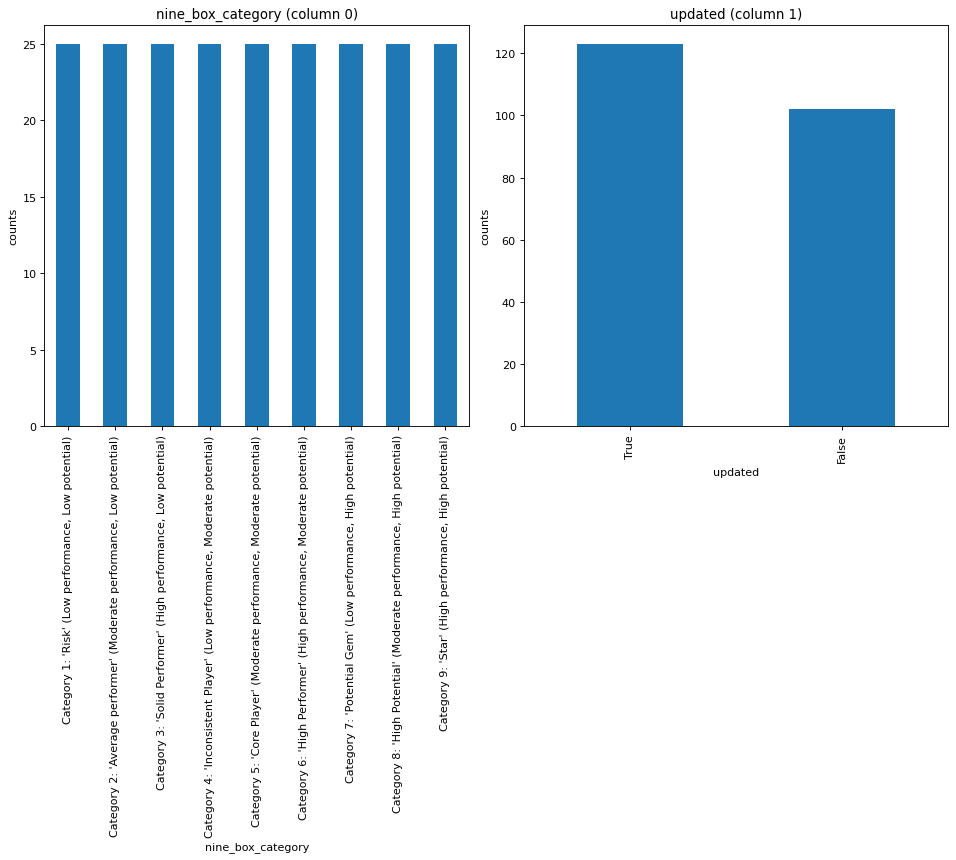

In [140]:
plotPerColumnDistribution(df1, 10, 5)

In [141]:
import numpy as np

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis=1)  # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    df_numeric = df.select_dtypes(include=[np.number])
    if df_numeric.shape[1] < 2:
        print(f'No correlation plots shown: The number of numeric columns ({df_numeric.shape[1]}) is less than 2')
        return
    corr = df_numeric.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [142]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [143]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# employee_review_mturk_dataset_test_v6_kaggle.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('employee_review.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'employee_review.csv'
nRow, nCol = df1.shape
#print(f'There are {nRow} rows and {nCol} columns')

In [144]:
df1.head(5)

,id,person_name,nine_box_category,feedback,updated,reviewed
0,20051,Lacey Howard,"Category 1: 'Risk' (Low performance, Low poten...",Lacey's performance has been sub standard in t...,True,True
1,20057,Amy Jones,"Category 1: 'Risk' (Low performance, Low poten...",Amy struggles at her work a lot. Shes always o...,True,True
2,20058,Amy Jones,"Category 1: 'Risk' (Low performance, Low poten...",Amy Jones is a nice person and she is dedicate...,True,True
3,20059,Amy Jones,"Category 1: 'Risk' (Low performance, Low poten...",Amy Jones needs to become a better player. She...,True,True
4,20060,Amy Jones,"Category 1: 'Risk' (Low performance, Low poten...",Amy is able to focus on the task at hand only ...,True,True


In [145]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# employee_review_mturk_dataset_v10_kaggle.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('employee_reviews.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'employee_reviews.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 878 rows and 6 columns


In [146]:
df2.head(5)

,id,person_name,nine_box_category,feedback,adjusted,reviewed
0,1,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John has not progressed in his position. He is...,False,True
1,2,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John has consistently disappointed me this qua...,False,True
2,3,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John turned in subpar work product all quarter...,False,True
3,6,John Doe,"Category 1: 'Risk' (Low performance, Low poten...",John Doe demonstrates a low level of knowledge...,False,True
4,7,George Gill,"Category 1: 'Risk' (Low performance, Low poten...",George gill's performance is really poor. He d...,False,True


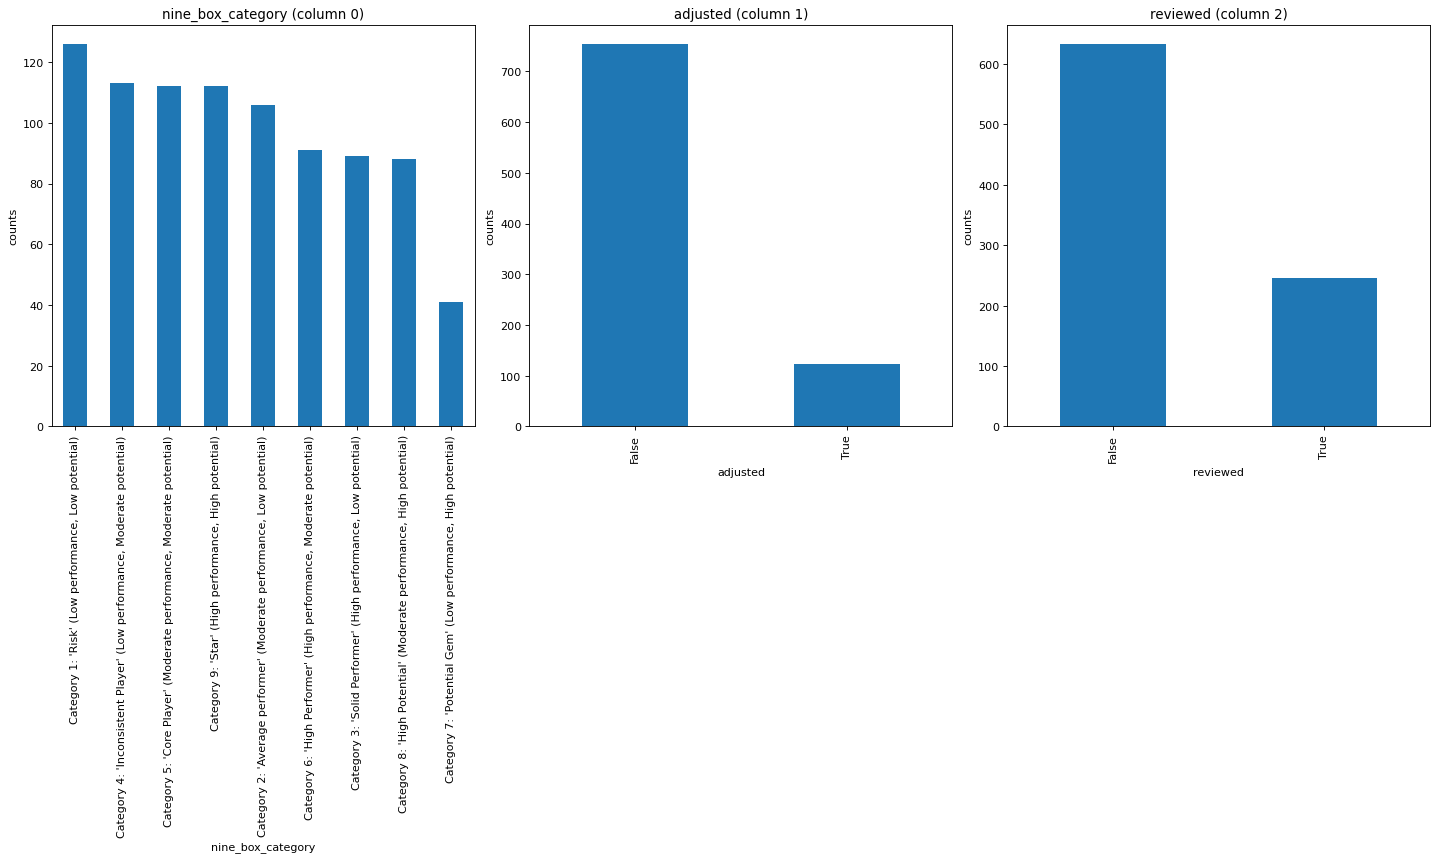

In [147]:
plotPerColumnDistribution(df2, 10, 5)

In [148]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# test_set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('test_set.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'test_set.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 225 rows and 10 columns


In [149]:
df3.head(5)

,id,person_name,nine_box_category,feedback,updated,reviewed,label,performance_class,potential_class,feedback_clean
0,20051,Lacey Howard,"Category 1: 'Risk' (Low performance, Low poten...",Lacey's performance has been sub standard in t...,True,True,0,0,0,laceys performance ha been sub standard in the...
1,20214,Jon Fischer,"Category 1: 'Risk' (Low performance, Low poten...",Jon Fischer has not been instrumental so far a...,False,True,0,0,0,jon fischer ha not been instrumental so far at...
2,20213,Jon Fischer,"Category 1: 'Risk' (Low performance, Low poten...",Jon fisher is a disappointment. Lazy and compl...,False,True,0,0,0,jon fisher is a disappointment lazy and compla...
3,20212,Jon Fischer,"Category 1: 'Risk' (Low performance, Low poten...",Jon has been really difficult to work with for...,False,True,0,0,0,jon ha been really difficult to work with for ...
4,20186,Johanna Duke,"Category 1: 'Risk' (Low performance, Low poten...",Despite Johanna Duke appearing to be a capable...,True,True,0,0,0,despite johanna duke appearing to be a capable...


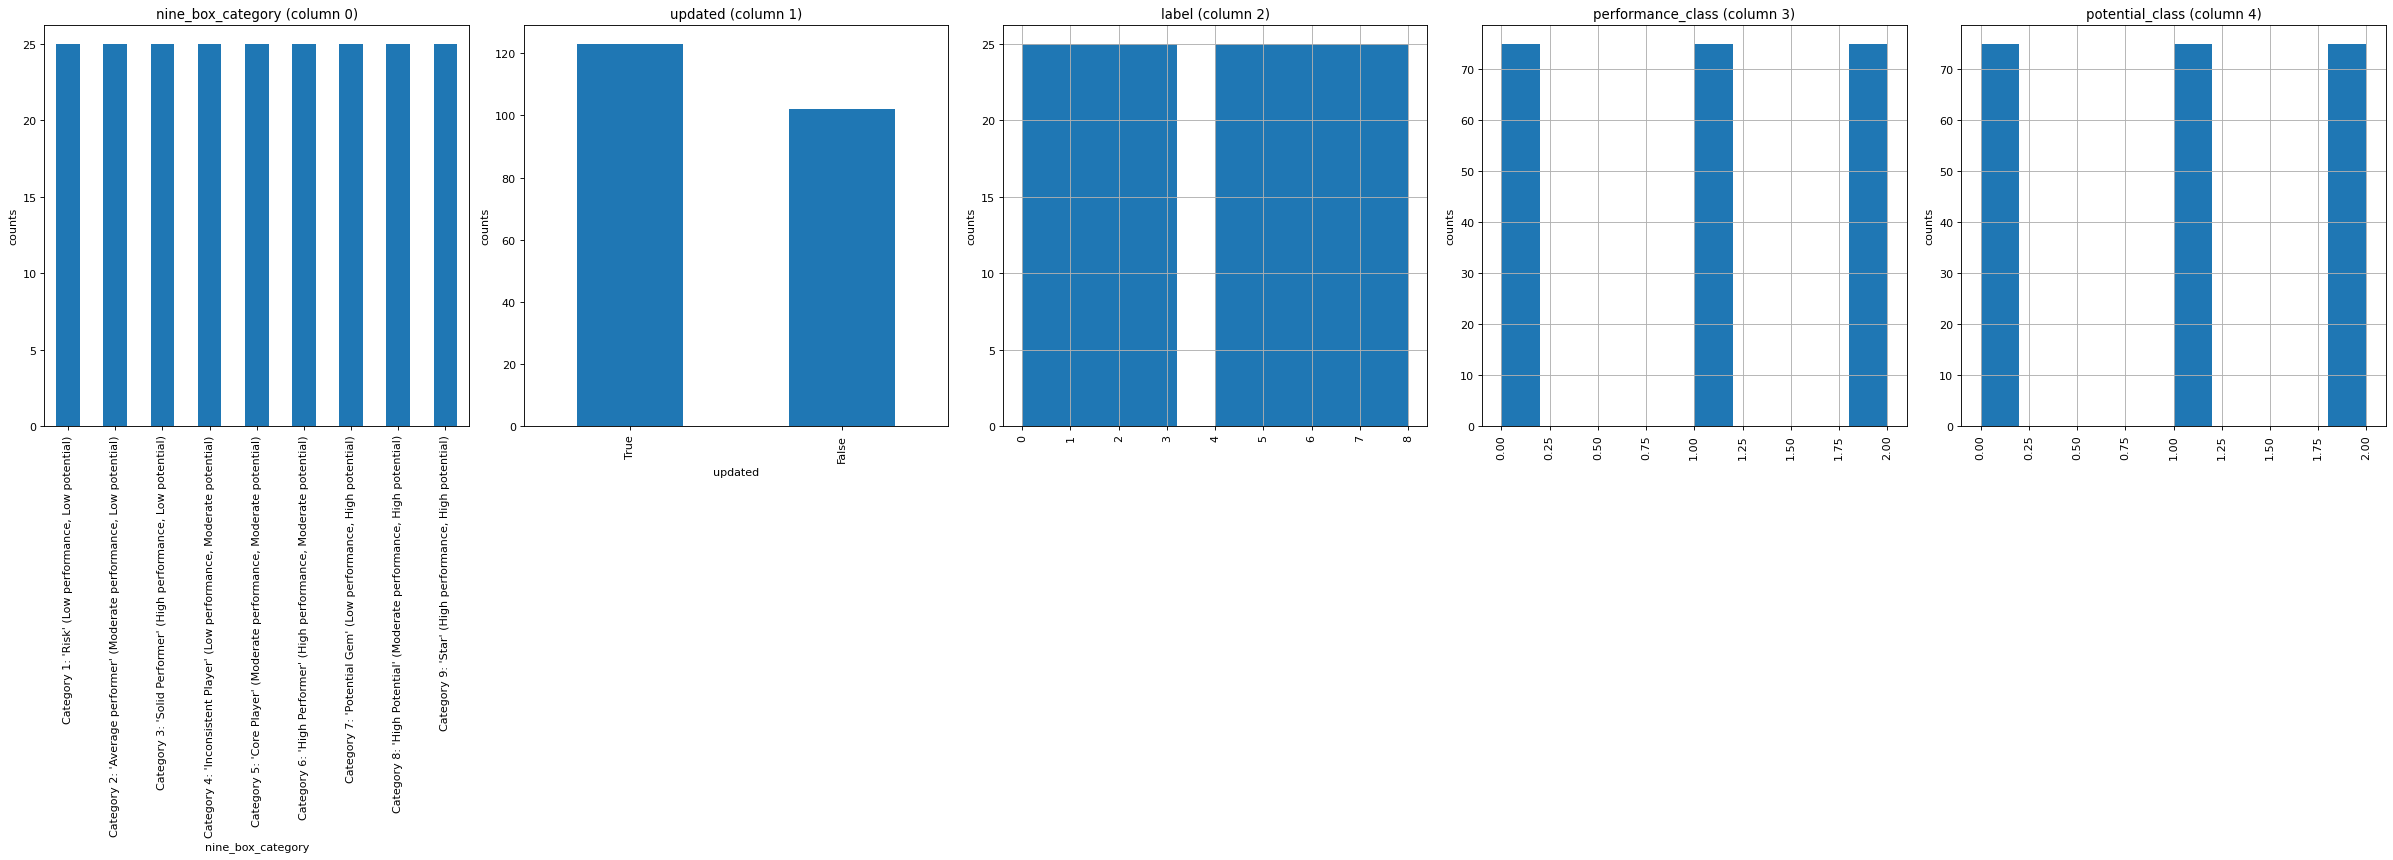

In [150]:
plotPerColumnDistribution(df3, 10, 5)

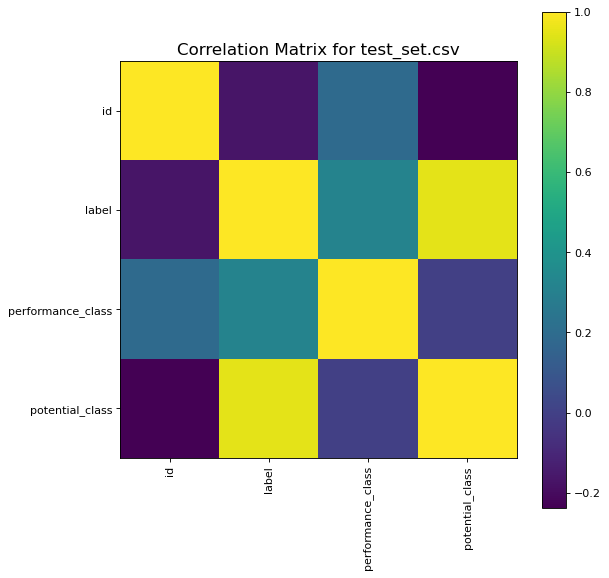

In [151]:
plotCorrelationMatrix(df3, 8)